<a href="https://colab.research.google.com/github/KavanaPadaki/MNSIT-using-ANN-and-Dropout-layers/blob/main/MNSIT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  MNIST Handwritten Digit Dataset

The **MNIST dataset** is a classic benchmark in machine learning and computer vision.  
It contains **70,000 grayscale images** of handwritten digits (0–9), each sized **28×28 pixels**.

- **Training set:** 60,000 images  
- **Test set:** 10,000 images  
- **Classes:** 10 (digits 0 through 9)  
- **Image format:** Grayscale (single channel), 8‑bit unsigned integers (0–255) in the raw dataset.  
For most deep learning models, pixel values are normalized to the range **[0, 1]** by dividing by 255.0.  


MNIST is widely used for:
- Image classification experiments
- Testing neural network architectures
- Demonstrating concepts like convolution, pooling, and dropout

---

# **Importing Essential libraries**

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten,Dropout
from tensorflow.keras.utils import to_categorical


**Loading MNSIT data**

In [ ]:
(X_train, y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

**EDA**

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

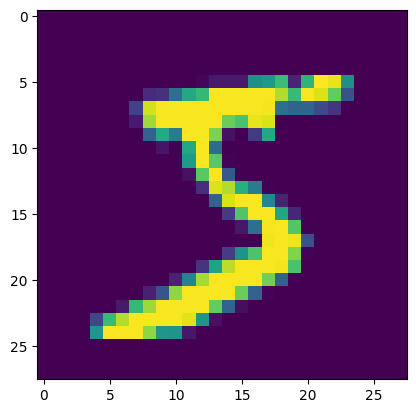

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

**Normalizing the data**

In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
#X_train[0]

# **Building the model with dropout**

Dropout is a regularization technique that reduces overfitting by randomly deactivating a fraction of neurons during training. This forces the network to learn redundant, robust features, improving its ability to generalize to unseen data and preventing reliance on specific neuron pathways.

In [ ]:

model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(512, activation='relu'),
    Dropout(0.5),  # Drop 50% of neurons during training
    Dense(256, activation='relu'),
    Dropout(0.3),  # Drop 30% here
    Dense(10, activation='softmax')
])


In [ ]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 535,818 (2.04 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [ ]:
print(y_train.shape)
print(y_train[0])

(60000,)
5


In [ ]:
history = model.fit(X_train,y_train,epochs=10, batch_size = 128, validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.7960 - loss: 0.6501 - val_accuracy: 0.9574 - val_loss: 0.1412
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.9463 - loss: 0.1785 - val_accuracy: 0.9693 - val_loss: 0.1045
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9609 - loss: 0.1275 - val_accuracy: 0.9708 - val_loss: 0.0950
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9660 - loss: 0.1074 - val_accuracy: 0.9737 - val_loss: 0.0842
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9704 - loss: 0.0927 - val_accuracy: 0.9740 - val_loss: 0.0839
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.9730 - loss: 0.0839 - val_accuracy: 0.9770 - val_loss: 0.0776
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9761 - loss: 0.0754 - val_accuracy: 0.9786 - val_loss: 0.0754
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9785 - loss: 0.0650 - val_acc

In [ ]:
y_prob = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [ ]:
y_pred = y_prob.argmax(axis =1)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9806

##  **Training and Validation Metrics**

The following plots show how the model’s performance evolved over epochs:

1. **Loss Curve**  
   - **Train Loss**: Measures how well the model fits the training data.  
   - **Validation Loss**: Indicates how well the model generalizes to unseen data.  
   - A small gap between them suggests good generalization; a large gap may indicate overfitting.

2. **Accuracy Curve**  
   - **Train Accuracy**: Accuracy on the training set.  
   - **Validation Accuracy**: Accuracy on the validation set.  
   - Ideally, both curves should rise and stabilize without diverging significantly.

These visualizations help diagnose:
- Underfitting (both curves low)
- Overfitting (train high, validation low)
- Well-balanced training (both high and close together)

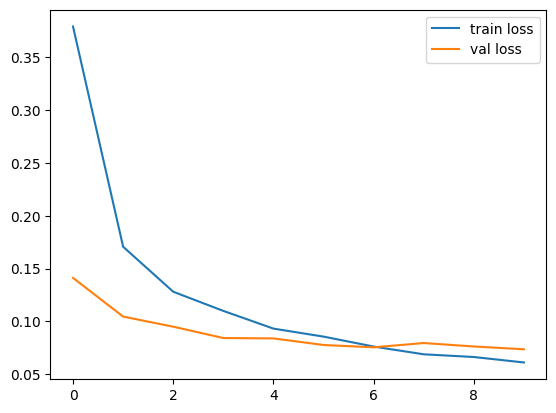

In [ ]:
plt.plot(history.history['loss'],label='train loss')
plt.plot(history.history['val_loss'],label='val loss')
plt.legend()
plt.show()

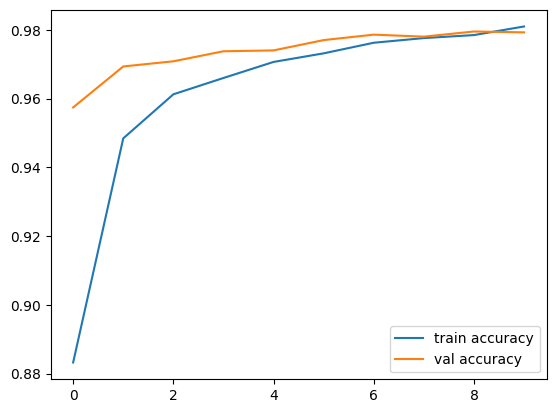

In [ ]:
plt.plot(history.history['accuracy'],label='train accuracy')
plt.plot(history.history['val_accuracy'],label='val accuracy')
plt.legend()
plt.show()

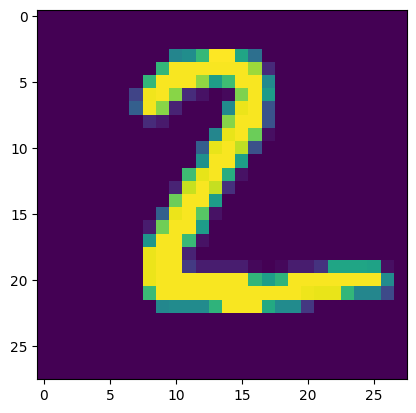

In [ ]:
plt.imshow(X_test[1])

In [ ]:
model.predict(X_test[1].reshape(1,28,28)).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


array([2])

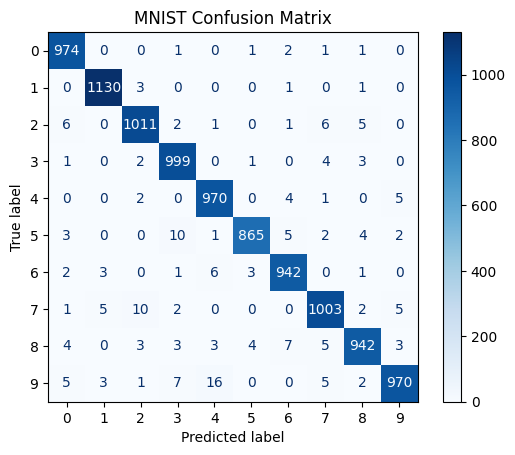

In [40]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', values_format='d')
plt.title("MNIST Confusion Matrix")
plt.show()